# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
# Read the XLSX file
data = pd.read_csv("dataset_bronze.csv")

In [3]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,Les Vengeances de Maître Poutifard,28/06/2023,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"France,Belgique",Français,Long-métrage,2023,-,360 119 entrées,"2,0","2,1",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
1,Le Challenge,21/06/2023,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,NaN,Anglais,Long-métrage,2023,-,116 813 entrées,"3,0","3,1",5 articles de presse,NaN,Maddie est sur le point de perdre sa maison d’...,54 361
2,La Petite sirène,24/05/2023,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,NaN,Anglais,Long-métrage,2023,-,1 688 076 entrées,"2,5","2,3",20 articles de presse,NaN,"Les années 1830, dans les eaux d'une île ficti...",582 814
3,Un homme idéal,18/03/2015,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,NaN,Français,Long-métrage,2014,-,666 835 entrées,"3,2","3,8",24 articles de presse,NaN,"Mathieu, 25 ans, aspire depuis toujours à deve...",337 525
4,Mission : Impossible - Protocole fantôme,14/12/2011,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,NaN,Anglais,Long-métrage,2011,140 000 000 $,2 414 279 entrées,"3,9","3,8",26 articles de presse,3 nominations,Impliquée dans l'attentat terroriste du Kremli...,827 046


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             4913 non-null   object 
 1   date              4608 non-null   object 
 2   genre             3148 non-null   object 
 3   durée             4906 non-null   float64
 4   réalisateur       4913 non-null   object 
 5   distributeur      4786 non-null   object 
 6   acteurs           4891 non-null   object 
 7   titre_original    1998 non-null   object 
 8   nationalités      1361 non-null   object 
 9   langue_d_origine  4913 non-null   object 
 10  type_film         4913 non-null   object 
 11  annee_production  4913 non-null   int64  
 12  budget            4913 non-null   object 
 13  box_office_total  4357 non-null   object 
 14  note_presse       4910 non-null   object 
 15  note_spectateurs  4583 non-null   object 
 16  nombre_article    4898 non-null   object 


In [51]:
data.shape

(4913, 20)

In [52]:
print(data['box_office_total'].unique())

['360 119 entrées' '116 813 entrées' '1 688 076 entrées' ...
 '3 049 300 entrées' '39 entrées' '63 284 entrées']


## <font color="green"> || - Missing Data </font>

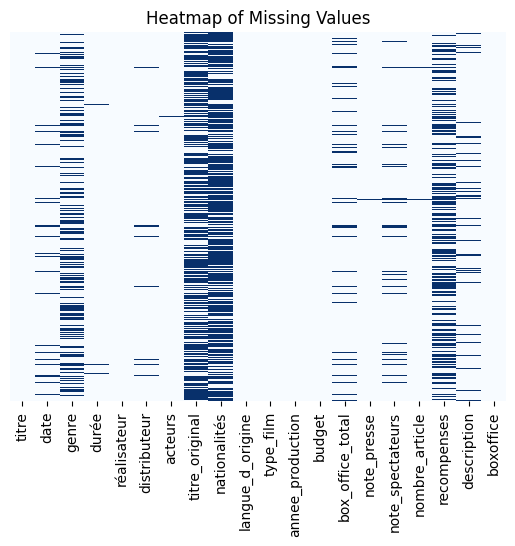

In [53]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [54]:
data.isnull().sum()

titre                  0
date                 305
genre               1765
durée                  7
réalisateur            0
distributeur         127
acteurs               22
titre_original      2915
nationalités        3552
langue_d_origine       0
type_film              0
annee_production       0
budget                 0
box_office_total     556
note_presse            3
note_spectateurs     330
nombre_article        15
recompenses         2495
description          518
boxoffice              0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [55]:
data.duplicated().sum()

0

## <font color="green"> IV - Nettoyage Données Quantitatives </font>

In [56]:
def convert_data_types(df):
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Convertir la colonne 'durée' en type float
    df['durée'] = pd.to_numeric(df['durée'], errors='coerce')

    # Convertir la colonne 'annee_production' en type int
    df['annee_production'] = df['annee_production'].astype(int)

    # Convertir les colonnes 'note_presse' et 'note_spectateurs' en type float
    df['note_presse'] = pd.to_numeric(df['note_presse'].str.replace(',', '.'), errors='coerce')
    df['note_spectateurs'] = pd.to_numeric(df['note_spectateurs'].str.replace(',', '.'), errors='coerce')

    # Convertir la colonne 'nombre_article' en type int en gardant seulement le nombre
    df['nombre_article'] = df['nombre_article'].str.extract('(\d+)').astype(float)

      # Replace the values '-' with pd.NA
    df['budget'] = df['budget'].replace('-', pd.NA)
   
    # Use regular expressions to extract the numeric part of the 'budget' column
    df['budget'] = df['budget'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))

    # Convert the 'budget' column to a numeric type (float), handling NaN values appropriately
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

    # Enlever le texte dans la colonne 'box_office_total' et convertir en type int
    df['box_office_total'] = df['box_office_total'].str.replace(' ', '').str.replace('entrées', '')

    # Convert the 'box_office_total' column to type int using pd.to_numeric with errors='coerce'
    df['box_office_total'] = pd.to_numeric(df['box_office_total'], errors='coerce').astype('Int64')
    
    # Convertir la colonne 'boxoffice' en type int
    df['boxoffice'] = df['boxoffice'].str.replace(' ', '').astype(int)

    return df

In [57]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,Les Vengeances de Maître Poutifard,28/06/2023,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"France,Belgique",Français,Long-métrage,2023,-,360 119 entrées,"2,0","2,1",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
1,Le Challenge,21/06/2023,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,NaN,Anglais,Long-métrage,2023,-,116 813 entrées,"3,0","3,1",5 articles de presse,NaN,Maddie est sur le point de perdre sa maison d’...,54 361
2,La Petite sirène,24/05/2023,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,NaN,Anglais,Long-métrage,2023,-,1 688 076 entrées,"2,5","2,3",20 articles de presse,NaN,"Les années 1830, dans les eaux d'une île ficti...",582 814
3,Un homme idéal,18/03/2015,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,NaN,Français,Long-métrage,2014,-,666 835 entrées,"3,2","3,8",24 articles de presse,NaN,"Mathieu, 25 ans, aspire depuis toujours à deve...",337 525
4,Mission : Impossible - Protocole fantôme,14/12/2011,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,NaN,Anglais,Long-métrage,2011,140 000 000 $,2 414 279 entrées,"3,9","3,8",26 articles de presse,3 nominations,Impliquée dans l'attentat terroriste du Kremli...,827 046


In [58]:
data_propre = convert_data_types(data)

/tmp/ipykernel_28265/3767715862.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [59]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             4913 non-null   object        
 1   date              4608 non-null   datetime64[ns]
 2   genre             3148 non-null   object        
 3   durée             4906 non-null   float64       
 4   réalisateur       4913 non-null   object        
 5   distributeur      4786 non-null   object        
 6   acteurs           4891 non-null   object        
 7   titre_original    1998 non-null   object        
 8   nationalités      1361 non-null   object        
 9   langue_d_origine  4913 non-null   object        
 10  type_film         4913 non-null   object        
 11  annee_production  4913 non-null   int64         
 12  budget            1983 non-null   float64       
 13  box_office_total  4357 non-null   Int64         
 14  note_presse       4910 n

In [60]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"France,Belgique",Français,Long-métrage,2023,NaN,360119,2.0,2.1,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,NaN,Anglais,Long-métrage,2023,NaN,116813,3.0,3.1,5.0,NaN,Maddie est sur le point de perdre sa maison d’...,54361
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,NaN,Anglais,Long-métrage,2023,NaN,1688076,2.5,2.3,20.0,NaN,"Les années 1830, dans les eaux d'une île ficti...",582814
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,NaN,Français,Long-métrage,2014,NaN,666835,3.2,3.8,24.0,NaN,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,NaN,Anglais,Long-métrage,2011,140000000.0,2414279,3.9,3.8,26.0,3 nominations,Impliquée dans l'attentat terroriste du Kremli...,827046


In [61]:
print(data_propre['box_office_total'].unique())

<IntegerArray>
[ 360119,  116813, 1688076,  666835, 2414279,   87911, 2294174,    <NA>,
   70862, 1385302,
 ...
   67643,  170106,  349427,   56020,  486068,      20,   84371, 3049300,
      39,   63284]
Length: 4260, dtype: Int64


In [62]:
print(data_propre['box_office_total'].unique())

<IntegerArray>
[ 360119,  116813, 1688076,  666835, 2414279,   87911, 2294174,    <NA>,
   70862, 1385302,
 ...
   67643,  170106,  349427,   56020,  486068,      20,   84371, 3049300,
      39,   63284]
Length: 4260, dtype: Int64


In [63]:
data_propre.shape

(4913, 20)

## <font color="green"> V - Nettoyage Données Qualitatives </font>

In [64]:
print(data_propre['langue_d_origine'].unique())

['Français' 'Anglais' 'Italien' 'Anglais, Japonais' 'Japonais' 'Espagnol'
 'Français, Anglais' 'Anglais, Français' 'Arabe, Français, Portugais'
 'Français, Algérien' 'Russe' 'Espagnol, Français, Gaélique' 'Coréen'
 'Allemand' 'Arabe, Français' 'Perse' 'Français, Arabe'
 'Anglais, Allemand, Français' 'Anglais, Espagnol'
 'Allemand, Anglais, Français, Hongrois' 'Français, Allemand, Anglais'
 'Français, Allemand' 'Anglais, Cantonais, Mandarin' 'Urdu' 'Muet'
 'Chinois' 'Arabe' 'Anglais, Français, Italien'
 'Japonais, Coréen, Langue des signes' 'Français, Arabe, Somalien'
 'Espagnol, Anglais' 'Néerlandais' 'Algérien, Français' 'Turc'
 'Chinois, Japonais, Cantonais' 'Anglais, Suédois' 'Portugais' 'Hongrois'
 'Japonais, Chinois' 'Hebreu, Roumain, Français, Allemand'
 'Anglais, Allemand' 'Anglais, Russe' 'Anglais, Français, Allemand'
 'Islandais, Danois' 'Kazakh' 'Gaélique' 'Norvégien' 'Danois'
 'Norvégien, Urdu' 'Français, Bengali'
 'Anglais, Japonais, Français, Allemand' 'Français, Anglais, 

In [65]:
# Extract the number of awards and nominations using regular expressions
data_propre['awards'] = data_propre['recompenses'].apply(lambda x: int(re.search(r'(\d+) prix', str(x)).group(1)) if re.search(r'(\d+) prix', str(x)) else 0)
data_propre['nominations'] = data_propre['recompenses'].apply(lambda x: int(re.search(r'(\d+) nominations', str(x)).group(1)) if re.search(r'(\d+) nominations', str(x)) else 0)

# Drop the 'recompenses' column if no longer needed
span[@class contains , 'Ntaionnality']

In [66]:
data_propre.tail()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice,awards,nominations
4908,Star Wars : Episode III - La Revanche des Sith,2005-05-18,"Action,Aventure",140.0,George Lucas,20th Century Studios,"Hayden Christensen,Ewan McGregor,Natalie Portman",Star Wars: Episode III - Revenge of the Sith,NaN,Anglais,...,115000000.0,<NA>,3.9,4.2,23.0,5 prix et 13 nominations,La Guerre des Clones fait rage. Une franche ho...,3303005,5,13
4909,Spider-Man 3,2007-01-05,Action,139.0,Sam Raimi,Gaumont Columbia Tristar Films,"Tobey Maguire,Kirsten Dunst,James Franco",NaN,NaN,Anglais,...,258000000.0,<NA>,3.7,3.5,27.0,1 prix et 13 nominations,Peter Parker a enfin réussi à concilier son am...,2778533,1,13
4910,Taxi 3,2003-01-29,Comédie,90.0,Gérard Krawczyk,ARP Sélection,"Frédéric Diefenthal,Samy Naceri,Marion Cotillard",NaN,NaN,Français,...,14490000.0,<NA>,2.8,1.5,8.0,NaN,"Marseille, à l'approche de Noël. Daniel ne ces...",2251493,0,0
4911,Spider-Man,2002-12-06,Action,121.0,Sam Raimi,Columbia TriStar Films,"Tobey Maguire,Willem Dafoe,Kirsten Dunst",NaN,NaN,Anglais,...,139000000.0,<NA>,4.2,4.0,25.0,4 nominations,"Orphelin, Peter Parker est élevé par sa tante ...",1903136,0,4
4912,Arthur et les Minimoys,2006-11-29,"Aventure,Fantastique,Famille",94.0,Luc Besson,EuropaCorp Distribution,"Freddie Highmore,Mia Farrow,Mylène Farmer",NaN,NaN,Anglais,...,65200000.0,<NA>,3.3,3.0,25.0,2 prix et 3 nominations,"Comme tous les enfants de son âge, Arthur est ...",1510369,2,3


In [67]:
# Drop the 'recompenses' column if no longer needed
data_propre.drop(columns=['recompenses'], inplace=True)

In [68]:
test_data = data_propre

In [69]:
# Split the values in the 'nationalités' column by commas and create a list of nationalities
test_data['nationalités'] = test_data['nationalités'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Flatten the list of nationalities and remove leading/trailing whitespaces
test_data['nationalités'] = test_data['nationalités'].apply(lambda x: [nationality.strip() for nationality in x])

In [70]:
test_data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,awards,nominations
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"[France, Belgique]",Français,...,2023,NaN,360119,2.0,2.1,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,0,0
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,[],Anglais,...,2023,NaN,116813,3.0,3.1,5.0,Maddie est sur le point de perdre sa maison d’...,54361,0,0
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,[],Anglais,...,2023,NaN,1688076,2.5,2.3,20.0,"Les années 1830, dans les eaux d'une île ficti...",582814,0,0
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,[],Français,...,2014,NaN,666835,3.2,3.8,24.0,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525,0,0
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,[],Anglais,...,2011,140000000.0,2414279,3.9,3.8,26.0,Impliquée dans l'attentat terroriste du Kremli...,827046,0,3


In [71]:
print(data['genre'].unique())

['Famille' nan 'Famille,Fantastique' 'Espionnage,Thriller' 'Historique'
 'Drame' 'Aventure,Drame' 'Drame,Comédie' 'Romance' 'Thriller' 'Policier'
 'Policier,Drame' 'Thriller,Comédie' 'Comédie' 'Aventure' 'Action,Famille'
 'Action' 'Drame,Science fiction' 'Romance,Thriller'
 'Fantastique,Romance,Musical' 'Fantastique,Romance,Comédie musicale'
 'Fantastique' 'Aventure,Famille' 'Historique,Drame' 'Action,Comédie'
 'Action,Thriller' 'Biopic,Fantastique' 'Science fiction,Action'
 'Aventure,Science fiction' 'Science fiction,Thriller'
 'Thriller,Espionnage' 'Science fiction,Comédie,Drame' 'Musical'
 'Fantastique,Famille' 'Historique,Biopic' 'Comédie,Aventure,Famille'
 'Fantastique,Aventure' 'Policier,Thriller' 'Epouvante-horreur'
 'Historique,Romance' 'Famille,Comédie' 'Musical,Drame' 'Thriller,Guerre'
 'Action,Fantastique,Aventure' 'Action,Aventure,Comédie musicale'
 'Comédie,Famille' 'Espionnage,Aventure' 'Historique,Thriller'
 'Comédie,Drame,Science fiction,Arts Martiaux' 'Thriller,Judicia

In [72]:
def nettoyage_qualita(df):
    # Clean 'titre' column by removing leading/trailing whitespaces
    df['titre'] = df['titre'].str.strip()
    # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
    # Clean 'genre' column by replacing missing values with NaN
    df['genre'] = df['genre'].replace('', np.nan)

    df['réalisateur'] = df['réalisateur'].str.strip()
    # Clean 'distributeur' column by removing leading/trailing whitespaces
    df['distributeur'] = df['distributeur'].str.strip()
    # Clean 'acteurs' column by splitting the names into a list
    df['acteurs'] = df['acteurs'].str.split(',')
    # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
    df['langue_d_origine'] = df['langue_d_origine'].str.strip()
    # Clean 'type_film' column by filling missing values with 'Unknown'
    df['type_film'] = df['type_film'].replace('', np.nan)
    # Clean 'description' column by removing leading/trailing whitespaces
    df['description'] = df['description'].str.strip()

    return df

In [73]:
propre_data2 = nettoyage_qualita(data_propre)

In [74]:
propre_data2.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,awards,nominations
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",NaN,"[France, Belgique]",Français,...,2023,NaN,360119,2.0,2.1,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,0,0
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"[Jennifer Lawrence, Andrew Barth Feldman, Laur...",No Hard Feelings,[],Anglais,...,2023,NaN,116813,3.0,3.1,5.0,Maddie est sur le point de perdre sa maison d’...,54361,0,0
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"[Halle Bailey, Cerise Calixte, Jonah Hauer-King]",The Little Mermaid,[],Anglais,...,2023,NaN,1688076,2.5,2.3,20.0,"Les années 1830, dans les eaux d'une île ficti...",582814,0,0
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"[Pierre Niney, Ana Girardot, André Marcon]",NaN,[],Français,...,2014,NaN,666835,3.2,3.8,24.0,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525,0,0
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"[Tom Cruise, Jeremy Renner, Simon Pegg]",Mission: Impossible - Ghost Protocol,[],Anglais,...,2011,140000000.0,2414279,3.9,3.8,26.0,Impliquée dans l'attentat terroriste du Kremli...,827046,0,3


In [75]:
# Filtrer les lignes avec la langue 'anglais'
colonnes_anglais = propre_data2[propre_data2['langue_d_origine'].str.contains('Anglais', case=False, na=False)]

# Afficher les colonnes où la langue contient 'anglais'
print(colonnes_anglais)

                                               titre       date  \
1                                       Le Challenge 2023-06-21   
2                                   La Petite sirène 2023-05-24   
4           Mission : Impossible - Protocole fantôme 2011-12-14   
6                                   Fast & Furious X 2023-05-17   
7                        L'Extraordinaire Mr. Rogers        NaT   
...                                              ...        ...   
4906              Une merveilleuse histoire du temps 2015-01-21   
4908  Star Wars : Episode III - La Revanche des Sith 2005-05-18   
4909                                    Spider-Man 3 2007-01-05   
4911                                      Spider-Man 2002-12-06   
4912                          Arthur et les Minimoys 2006-11-29   

                             genre  durée      réalisateur  \
1                              NaN  103.0  Gene Stupnitsky   
2              Famille,Fantastique  136.0     Rob Marshall   
4        

In [76]:
# Définir une fonction pour vérifier si la langue spécifiée existe dans la colonne 'langue_d_origine' (en ignorant les majuscules)
def check_language(langue, langue_origine):
    return True if langue_origine and langue.lower() in langue_origine.lower() else False

In [77]:
# Ajouter les colonnes 'Français', 'Anglais', 'Arabe' et 'Autre' avec les valeurs 1 ou 0
propre_data2['lng_Org_FR'] = propre_data2['langue_d_origine'].apply(lambda x: check_language('français', x)).astype(int)
propre_data2['lng_Org_ANG'] = propre_data2['langue_d_origine'].apply(lambda x: check_language('anglais', x)).astype(int)
propre_data2['lng_Org_AR'] = propre_data2['langue_d_origine'].apply(lambda x: check_language('arabe', x)).astype(int)
propre_data2['Autre_lang'] = propre_data2['langue_d_origine'].apply(lambda x: not any(lang in x.lower() for lang in ['français', 'anglais', 'arabe']) if x else True).astype(int)

In [78]:
# Afficher le DataFrame avec les nouvelles colonnes
propre_data2.head(20)

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,note_spectateurs,nombre_article,description,boxoffice,awards,nominations,lng_Org_FR,lng_Org_ANG,lng_Org_AR,Autre_lang
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",NaN,"[France, Belgique]",Français,...,2.1,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,0,0,1,0,0,0
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"[Jennifer Lawrence, Andrew Barth Feldman, Laur...",No Hard Feelings,[],Anglais,...,3.1,5.0,Maddie est sur le point de perdre sa maison d’...,54361,0,0,0,1,0,0
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"[Halle Bailey, Cerise Calixte, Jonah Hauer-King]",The Little Mermaid,[],Anglais,...,2.3,20.0,"Les années 1830, dans les eaux d'une île ficti...",582814,0,0,0,1,0,0
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"[Pierre Niney, Ana Girardot, André Marcon]",NaN,[],Français,...,3.8,24.0,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525,0,0,1,0,0,0
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"[Tom Cruise, Jeremy Renner, Simon Pegg]",Mission: Impossible - Ghost Protocol,[],Anglais,...,3.8,26.0,Impliquée dans l'attentat terroriste du Kremli...,827046,0,3,0,1,0,0
5,Il Boemo,2023-06-21,Historique,140.0,Petr Vaclav,Nour Films,"[Vojtěch Dyk, Barbara Ronchi, Elena Radonicich]",NaN,"[République tchèque, Italie, Slovaquie]",Italien,...,4.0,19.0,"1764. Dans une Venise libertine, le musicien e...",34803,0,0,0,0,0,1
6,Fast & Furious X,2023-05-17,NaN,141.0,Louis Leterrier,Universal Pictures International France,"[Vin Diesel, Michelle Rodriguez, Jason Momoa]",Fast X,[],Anglais,...,3.1,15.0,Après bien des missions et contre toute attent...,1140846,0,0,0,1,0,0
7,L'Extraordinaire Mr. Rogers,NaT,Drame,109.0,Marielle Heller,Sony Pictures Releasing France,"[Tom Hanks, Matthew Rhys, Susan Kelechi Watson]",A Beautiful Day in the Neighborhood,[],Anglais,...,3.1,4.0,"L'histoire de Fred Rogers, un homme de télé am...",13251238,0,5,0,1,0,0
8,Beau Is Afraid,2023-04-26,"Aventure,Drame",179.0,Ari Aster,ARP Sélection,"[Joaquin Phoenix, Nathan Lane, Amy Ryan]",NaN,[],Anglais,...,3.3,31.0,Beau tente désespérément de rejoindre sa mère....,35019,0,0,0,1,0,0
9,En corps,2022-03-30,"Drame,Comédie",118.0,Cédric Klapisch,StudioCanal,"[Marion Barbeau, Hofesh Shechter, Denis Podaly...",NaN,[],Français,...,4.1,33.0,"Elise, 26 ans est une grande danseuse classiqu...",332971,0,9,1,0,0,0


In [79]:
print(propre_data2['genre'].head(20))

0                 Famille
1                     NaN
2     Famille,Fantastique
3                     NaN
4     Espionnage,Thriller
5              Historique
6                     NaN
7                   Drame
8          Aventure,Drame
9           Drame,Comédie
10                Romance
11                    NaN
12               Thriller
13               Thriller
14               Policier
15         Policier,Drame
16         Policier,Drame
17       Thriller,Comédie
18         Aventure,Drame
19                    NaN
Name: genre, dtype: object


In [80]:
# Fill NaN values in 'genre' column with an empty list
propre_data2['genre'].fillna("", inplace=True)

# Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
propre_data2['genres'] = propre_data2['genre'].str.split(',')

# Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
genres_dict = {}
for genres_list in propre_data2['genres']:
    for genre in genres_list:
        genre = genre.strip()  # Supprimer les espaces en début et fin de genre
        if genre not in genres_dict:
            genres_dict[genre] = []

In [81]:
action_genres = ['Action', 'Thriller', 'Espionnage', 'Arts Martiaux', 'Guerre', 'Western' , 'Policier']
drama_genres = ['Drame', 'Romance', 'Biopic', 'Comédie dramatique', 'Judiciaire']
comedy_genres = ['Comédie' , 'Comédie musicale']
fantasy_scifi_genres = ['Fantastique', 'Science fiction', 'Epouvante-horreur']
other_genres = ['Animation' , 'Famille', 'Historique', 'Musical', 'Erotique', 'Péplum', 'Sport event', 'Bollywood', 'Expérimental']

In [82]:
# Fonction pour vérifier si un film appartient à une famille de genres
def check_genre_family(genres_list, genre_family):
    for genre in genres_list:
        if genre in genre_family:
            return 1
    return 0

# Créer les colonnes de genres regroupées
propre_data2['Action'] = propre_data2['genres'].apply(lambda x: check_genre_family(x, action_genres))
propre_data2['Drame'] = propre_data2['genres'].apply(lambda x: check_genre_family(x, drama_genres))
propre_data2['Comédie'] = propre_data2['genres'].apply(lambda x: check_genre_family(x, comedy_genres))
propre_data2['fantasy_scifi'] = propre_data2['genres'].apply(lambda x: check_genre_family(x, fantasy_scifi_genres))
propre_data2['other_genres'] = propre_data2['genres'].apply(lambda x: check_genre_family(x, other_genres))

propre_data2.drop(columns=['genres'], inplace=True)

In [83]:
propre_data2.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,nominations,lng_Org_FR,lng_Org_ANG,lng_Org_AR,Autre_lang,Action,Drame,Comédie,fantasy_scifi,other_genres
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",NaN,"[France, Belgique]",Français,...,0,1,0,0,0,0,0,0,0,1
1,Le Challenge,2023-06-21,,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"[Jennifer Lawrence, Andrew Barth Feldman, Laur...",No Hard Feelings,[],Anglais,...,0,0,1,0,0,0,0,0,0,0
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"[Halle Bailey, Cerise Calixte, Jonah Hauer-King]",The Little Mermaid,[],Anglais,...,0,0,1,0,0,0,0,0,1,1
3,Un homme idéal,2015-03-18,,97.0,Yann Gozlan,Mars Films,"[Pierre Niney, Ana Girardot, André Marcon]",NaN,[],Français,...,0,1,0,0,0,0,0,0,0,0
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"[Tom Cruise, Jeremy Renner, Simon Pegg]",Mission: Impossible - Ghost Protocol,[],Anglais,...,3,0,1,0,0,1,0,0,0,0


In [84]:
print(data_propre['langue_d_origine'].unique())

['Français' 'Anglais' 'Italien' 'Anglais, Japonais' 'Japonais' 'Espagnol'
 'Français, Anglais' 'Anglais, Français' 'Arabe, Français, Portugais'
 'Français, Algérien' 'Russe' 'Espagnol, Français, Gaélique' 'Coréen'
 'Allemand' 'Arabe, Français' 'Perse' 'Français, Arabe'
 'Anglais, Allemand, Français' 'Anglais, Espagnol'
 'Allemand, Anglais, Français, Hongrois' 'Français, Allemand, Anglais'
 'Français, Allemand' 'Anglais, Cantonais, Mandarin' 'Urdu' 'Muet'
 'Chinois' 'Arabe' 'Anglais, Français, Italien'
 'Japonais, Coréen, Langue des signes' 'Français, Arabe, Somalien'
 'Espagnol, Anglais' 'Néerlandais' 'Algérien, Français' 'Turc'
 'Chinois, Japonais, Cantonais' 'Anglais, Suédois' 'Portugais' 'Hongrois'
 'Japonais, Chinois' 'Hebreu, Roumain, Français, Allemand'
 'Anglais, Allemand' 'Anglais, Russe' 'Anglais, Français, Allemand'
 'Islandais, Danois' 'Kazakh' 'Gaélique' 'Norvégien' 'Danois'
 'Norvégien, Urdu' 'Français, Bengali'
 'Anglais, Japonais, Français, Allemand' 'Français, Anglais, 

In [85]:
nationnalité_individual = propre_data2['nationalités'].explode()

# Éliminer les doublons pour obtenir les genres uniques
nationnalité_uniques = nationnalité_individual.drop_duplicates()

In [86]:
nationnalité_uniques.shape

(97,)

In [87]:
# Split the values in the 'nationalités' column by commas and create a list of nationalities
propre_data2['langue_d_origine'] = propre_data2['langue_d_origine'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

In [88]:
langue_d_origine_gh = propre_data2['langue_d_origine'].explode()

# Éliminer les doublons pour obtenir les genres uniques
langue_d_origine_gh = langue_d_origine_gh.drop_duplicates()

In [89]:
langue_d_origine_gh.shape

(119,)

In [90]:
langue_d_origine_gh.to_csv('langue_d_origine_gh.csv', index=False)

## <font color="green"> VI- Export silver Data </font>

In [91]:
# Sauvegarder les genres uniques dans un fichier CSV
nationnalité_uniques.to_csv('nationnalité_uniques.csv', index=False)

In [92]:
#EXporter la data dans un Csv 
data_propre.to_csv('data/dataset_silver.csv', index=False)